<font size="5"> Feature Preprocessing for ML inputs </font>
* Converted object variable (Exercise) to integer label(eg. 0 -> Bicep) so that model can process
* Draw heatmap for correlation matrix. Then filter out features where correlation coefficients are larger than 0.985
* Feature scaling (x-u)/std on features (ML inputs)
* Split datasets randomly into 70% for training and 30% for testing (random_state = 42, make sure all of us can get same result)
* Compared the performance <br>
  1) Trade-off between feature reduction and accuracy)<br>
  2) The effect of feature scaling for machine learning model )<br>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
features = pd.read_csv("feature.csv")

In [61]:
features.head()

,Exercise,Ax_Min,Ax_Max,Ax_Mean,Ax_std,Ax_med,Ay_Min,Ay_Max,Ay_Mean,Ay_std,...,Pitch_Min,Pitch_Max,Pitch_Mean,Pitch_std,Pitch_med,Roll_Min,Roll_Max,Roll_Mean,Roll_std,Roll_med
0,Bicep_FL,-1.022,0.996,-0.136052,0.800313,-0.2500,-0.236,0.139,-0.035155,0.097225,...,-88.878,69.663,-15.457093,60.857454,-17.2880,-10.517,6.229,-1.979258,5.175042,-4.0740
1,Bicep_FL,-0.988,0.990,-0.191798,0.816737,-0.5710,-0.316,0.186,0.003697,0.134753,...,-83.749,72.856,-18.840121,62.050697,-39.0350,-15.704,9.220,0.299101,7.527709,4.8900
2,Bicep_FL,-1.006,0.981,-0.237722,0.772612,-0.5990,-0.162,0.165,0.040381,0.090307,...,-84.501,72.158,-21.689515,58.772669,-36.2670,-7.249,8.462,2.437165,4.993753,4.7070
3,Bicep_FL,-1.002,0.980,-0.284485,0.767278,-0.6780,-0.206,0.166,0.015414,0.061367,...,-87.935,70.351,-25.262242,58.227146,-40.7500,-7.172,5.952,0.917758,3.104093,1.3100
4,Bicep_FL,-1.009,0.976,-0.251888,0.781054,-0.6275,-0.349,0.193,0.031765,0.086389,...,-86.786,71.038,-22.797663,58.953704,-38.6125,-8.912,8.335,1.906112,4.366867,3.2655


In [62]:
Input = features.drop('Exercise',axis = 1)
Output = features['Exercise']

In [63]:
Input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ax_Min      641 non-null    float64
 1   Ax_Max      641 non-null    float64
 2   Ax_Mean     641 non-null    float64
 3   Ax_std      641 non-null    float64
 4   Ax_med      641 non-null    float64
 5   Ay_Min      641 non-null    float64
 6   Ay_Max      641 non-null    float64
 7   Ay_Mean     641 non-null    float64
 8   Ay_std      641 non-null    float64
 9   Ay_med      641 non-null    float64
 10  Az_Min      641 non-null    float64
 11  Az_Max      641 non-null    float64
 12  Az_Mean     641 non-null    float64
 13  Az_std      641 non-null    float64
 14  Az_med      641 non-null    float64
 15  Gx_Min      641 non-null    float64
 16  Gx_Max      641 non-null    float64
 17  Gx_Mean     641 non-null    float64
 18  Gx_std      641 non-null    float64
 19  Gx_med      641 non-null    f

In [64]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Output_l = labelencoder_Y.fit_transform(Output)
le_name_mapping = dict(zip(Output, labelencoder_Y.transform(Output)))
print(le_name_mapping)

{'Bicep_FL': 1, 'Bicep_FP': 2, 'Bicep_FS': 3, 'Bicep': 0, 'Rotation_FL': 7, 'Rotation': 5, 'Rotation2': 6, 'Straight_FL': 10, 'Straight_FP': 11, 'Straight_FS': 12, 'Straight': 8, 'Straight2': 9, 'Swing_FL': 14, 'Swing_FN': 15, 'Swing_FP': 16, 'Swing_FS': 17, 'Swing': 13, 'Bicep_FW': 4}


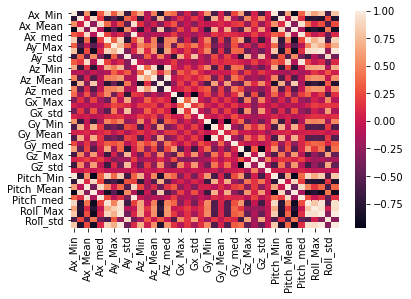

In [65]:
sns.heatmap(Input.corr())

In [66]:
corr = Input.corr();
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.985:
            if columns[j]:
                columns[j] = False
selected_columns = Input.columns[columns]
extracted_data = Input[selected_columns]
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ax_Min     641 non-null    float64
 1   Ax_Max     641 non-null    float64
 2   Ax_Mean    641 non-null    float64
 3   Ax_std     641 non-null    float64
 4   Ax_med     641 non-null    float64
 5   Ay_Min     641 non-null    float64
 6   Ay_Max     641 non-null    float64
 7   Ay_Mean    641 non-null    float64
 8   Ay_std     641 non-null    float64
 9   Az_Min     641 non-null    float64
 10  Az_Max     641 non-null    float64
 11  Az_Mean    641 non-null    float64
 12  Az_std     641 non-null    float64
 13  Az_med     641 non-null    float64
 14  Gx_Min     641 non-null    float64
 15  Gx_Max     641 non-null    float64
 16  Gx_Mean    641 non-null    float64
 17  Gx_std     641 non-null    float64
 18  Gx_med     641 non-null    float64
 19  Gy_Min     641 non-null    float64
 20  Gy_Max    

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(Input)
x_processed = scaler.fit_transform(extracted_data)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Input, Output_l, test_size=0.3, random_state=42) # unprocessed features
#X_train, X_test, y_train, y_test = train_test_split(x_scaled, Output_l, test_size=0.3, random_state=42) # unextracted but scaled features
#X_train, X_test, y_train, y_test = train_test_split(extracted_data, Output_l, test_size=0.3, random_state=42) # extracted but unscaled features
#X_train, X_test, y_train, y_test = train_test_split(x_processed, Output_l, test_size=0.3, random_state=42) # extraced and scaled features